# HOMEWORK 4 - ARNO AMABILE
___

# Assignment 1 - Distributions comparisons

In [62]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [63]:
df=pd.read_csv(os.getenv ('PUI2015')+'/Data/201505-citibike-tripdata.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961986 entries, 0 to 961985
Data columns (total 15 columns):
tripduration               961986 non-null int64
starttime                  961986 non-null object
stoptime                   961986 non-null object
start station id           961986 non-null int64
start station name         961986 non-null object
start station latitude     961986 non-null float64
start station longitude    961986 non-null float64
end station id             961986 non-null int64
end station name           961986 non-null object
end station latitude       961986 non-null float64
end station longitude      961986 non-null float64
bikeid                     961986 non-null int64
usertype                   961986 non-null object
birth year                 794434 non-null float64
gender                     961986 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 117.4+ MB


## 1 - Male vs. Female

In [65]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

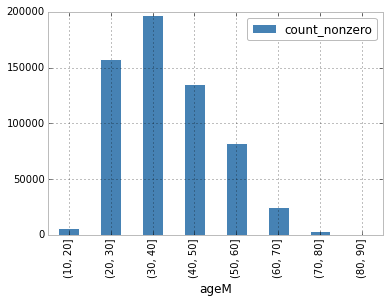

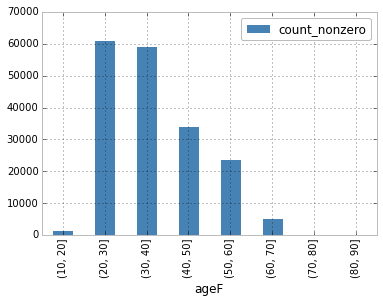

In [66]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

In [67]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

### a) KS Test of the two distributions

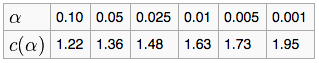

In [68]:
from IPython.display import Image
Image(filename="ks2sample_table.png")

In [88]:
ks, p =scipy.stats.ks_2samp(df.ageM, df.ageF)

alpha = 0.05
c = 1.36*sqrt((df.ageM.count() + df.ageF.count())/(df.ageM.count()*df.ageF.count()))

def report_result(ks,c):
    print "Is the KS statistic {0:.2f} bigger than the critical value {1:.2e}?".format(ks,c)
    if ks > c:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level \n\
    H0: the two samples are drawn from the same distribution'.format( 'reject' if ks > c  else 'fail to reject', 
                                                                     alpha*100) 
    
report_result(ks,c)

Is the KS statistic 0.44 bigger than the critical value 0.00e+00?
Yes
We reject the Null hypothesis for this month at the 5.0 % significance level 
    H0: the two samples are drawn from the same distribution


### b) Pearson's test for correlation

In [70]:
# I generate a random sample of my bikers, as I need arrays of the same shape for the test
ageM2 = np.random.choice(df.ageM.dropna(), 100000, replace=False)
ageF2 = np.random.choice(df.ageF.dropna(), 100000, replace=False)

In [86]:
pears, p = scipy.stats.pearsonr(ageM2, ageF2)
print "Pearson Correlation: {0:.2e}".format(pears)

def report_result(p,a):
    print "Is the p-value {0:.2f} smaller than the significance level {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level'.format( 'reject' if p < a 
                                                                                             else 'fail to reject',
                                                                                            alpha*100)     
report_result(p,alpha)

Pearson Correlation: 3.14e-03
Is the p-value 0.32 smaller than the significance level 0.05?
No
We fail to reject the Null hypothesis for this month at the 5.0 % significance level


According to Scipy Documentation, the p-value "indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets." A relatively high p-value for usual standards does hence not mean that the datasets are highly correlated either.

### c) Spearman's test

In [85]:
spear, p = scipy.stats.spearmanr(ageM2, ageF2)
print "Spearman Correlation: {0:.2e}".format(spear)

def report_result(p,a):
    print "Is the p-value {0:.2f} smaller than the significance level {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level'.format( 'reject' if p < a 
                                                                                             else 'fail to reject',
                                                                                            alpha*100)     
report_result(p,alpha)

Spearman Correlation: 4.40e-03
Is the p-value 0.16 smaller than the significance level 0.05?
No
We fail to reject the Null hypothesis for this month at the 5.0 % significance level


The results have the same meaning than for Pearson's test: the correlation is small, but the p-value is high, which means that we cannot reject the hypothesis that the two datasets are correlated.

**In conclusion**: The distribution of age for male and female riders are slightly correlated, but we reject the hypothesis that they are drawn from the same distributions at the 5 % significance level.

## 2 - Day vs. Night
### a) KS correlation test

In [73]:
# Use a temporary subset of the dataframe
temp = pd.DatetimeIndex(df['starttime'])

# Generate a dummy for the night
df['early'] = pd.get_dummies(temp.hour < 6)[1]
df['late'] = pd.get_dummies(temp.hour > 18)[1]
df['night'] = df['early'] + df['late']

In [74]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['night'] == 0)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['night'] == 1)]

In [75]:
df.ageD.count()

631569

In [82]:
ks, p = scipy.stats.ks_2samp(df.ageD, df.ageN)

alpha = 0.05
c = 1.36*sqrt((df.ageD.count() + df.ageN.count())/(df.ageD.count()*df.ageN.count()))

def report_result(ks,c):
    print "Is the KS statistic {0:.2f} bigger than the critical value {1:.2e}?".format(ks,c)
    if ks > c:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level \n\
    H0: the two samples are drawn from the same distribution'.format( 'reject' if ks > c  else 'fail to reject', 
                                                                     alpha*100) 
    
report_result(ks,c)

Is the KS statistic 0.49 bigger than the critical value 0.00e+00?
Yes
We reject the Null hypothesis for this month at the 5.0 % significance level 
    H0: the two samples are drawn from the same distribution


### b) Pearson's test

In [77]:
# I generate a random sample of my bikers, as I need arrays of the same shape for the test
ageD2 = np.random.choice(df.ageD.dropna(), 100000, replace=False)
ageN2 = np.random.choice(df.ageN.dropna(), 100000, replace=False)

In [84]:
pears, p = scipy.stats.pearsonr(ageD2, ageN2)
print "Pearson Correlation: {0:.2e}".format(pears)

def report_result(p,a):
    print "Is the p-value {0:.2f} smaller than the significance level {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level'.format( 'reject' if p < a 
                                                                                             else 'fail to reject',
                                                                                            alpha*100)     
report_result(p,alpha)

Pearson Correlation: -3.56e-03
Is the p-value 0.26 smaller than the significance level 0.05?
No
We fail to reject the Null hypothesis for this month at the 5.0 % significance level


### c) Spearman's test

In [83]:
spear, p = scipy.stats.spearmanr(ageD2, ageN2)
print "Spearman Correlation: {0:.2e}".format(spear)

def report_result(p,a):
    print "Is the p-value {0:.2f} smaller than the significance level {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'We {0} the Null hypothesis for this month at the {1} % significance level'.format( 'reject' if p < a 
                                                                                             else 'fail to reject',
                                                                                            alpha*100) 
    
report_result(p,alpha)

Spearman Correlation: -2.71e-03
Is the p-value 0.39 smaller than the significance level 0.05?
No
We fail to reject the Null hypothesis for this month at the 5.0 % significance level


**In conclusion**: The distribution of age for day and night riders are slightly correlated, but we reject the hypothesis that they are drawn from the same distributions.